In [21]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss , brier_score_loss

In [22]:
features_all = pd.read_csv("data/features_2022_2023_final.csv")

In [23]:
features_all

,id,match_id,team_id,possession_team_id,player_id,passer_name,pass_recipient_id,receiver_name,team_name,start_x,...,teammates_nearby,possession_xg,possession_goal,possession_xG_target,season,speed_difference,h1,h2,h3,h4
0,1256506933,5321419,6769,6769,77272,francis vries,487935,wenderson nascimento,Värnamo,54.60000,...,0,0.0000,False,0,2022,-0.507000,0.523384,0.687708,0.017926,0.018544
1,1256508233,5321419,6766,6769,546328,laorent shabani,272752,aron bjarnason,Sirius,72.45000,...,0,0.0000,False,0,2022,0.000791,0.550862,0.660946,0.020589,0.031487
2,1256507062,5321419,6769,6769,654790,robin tihi,582334,victor larsson,Värnamo,61.95000,...,0,0.0000,False,0,2022,0.250000,0.544200,0.705946,0.011379,0.020818
3,1256507101,5321419,6769,6769,654790,robin tihi,77272,francis vries,Värnamo,88.20000,...,0,0.0000,False,0,2022,0.009364,0.537617,0.643195,0.026477,0.048982
4,1256507134,5321419,6769,6769,582334,victor larsson,259306,evaldo neto,Värnamo,72.45000,...,0,0.0000,False,0,2022,-0.181636,0.558248,0.615058,0.012875,0.017125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74082,1625749288,5420697,6721,6769,212662,andre romer,509754,michael baidoo,IF Elfsborg,92.61000,...,0,0.0209,False,0,2023,0.125818,0.589834,0.693264,0.031895,0.107498
74083,1625749300,5420697,6721,6769,587166,jack cooper-love,607268,jacob ondrejka,IF Elfsborg,67.14225,...,1,0.0000,False,0,2023,0.370264,0.547694,0.707382,0.047441,0.020379
74084,1625749310,5420697,6721,6769,676013,ahmed qasem,587166,jack cooper-love,IF Elfsborg,105.00000,...,1,0.0000,False,0,2023,0.213455,0.557538,0.560107,0.081753,0.053737
74085,1625748978,5420697,6754,6769,581623,herman johansson,730438,otto rosengren,Mjällby,76.40325,...,2,0.0000,False,0,2023,-1.078282,0.573957,0.654464,0.038029,0.079728


In [24]:
features_all.shape

(74087, 47)

In [25]:
features_all.columns

Index(['id', 'match_id', 'team_id', 'possession_team_id', 'player_id',
       'passer_name', 'pass_recipient_id', 'receiver_name', 'team_name',
       'start_x', 'start_y', 'end_x', 'end_y', 'passer_x', 'passer_y',
       'start_distance_to_goal', 'end_distance_to_goal', 'pass_length',
       'pass_angle', 'start_angle_to_goal', 'end_angle_to_goal',
       'start_distance_to_sideline', 'end_distance_to_sideline',
       'forward pass', 'backward pass', 'lateral pass', 'teammates_behind',
       'teammates_beyond', 'opponents_beyond', 'opponents_behind',
       'opponents_between', 'packing', 'pressure_on_passer',
       'average_speed_of_teammates', 'average_speed_of_opponents',
       'opponents_nearby', 'pressure level passer', 'teammates_nearby',
       'possession_xg', 'possession_goal', 'possession_xG_target', 'season',
       'speed_difference', 'h1', 'h2', 'h3', 'h4'],
      dtype='object')

In [26]:
features_corr = features_all[['start_distance_to_goal', 'end_distance_to_goal', 'pass_length',
       'pass_angle', 'start_angle_to_goal', 'end_angle_to_goal',
       'start_distance_to_sideline', 'end_distance_to_sideline',
       'teammates_behind','teammates_beyond', 'opponents_beyond', 'opponents_behind',
       'opponents_between', 'packing', 'pressure_on_passer',
       'average_speed_of_teammates', 'average_speed_of_opponents',
       'opponents_nearby', 'teammates_nearby']]

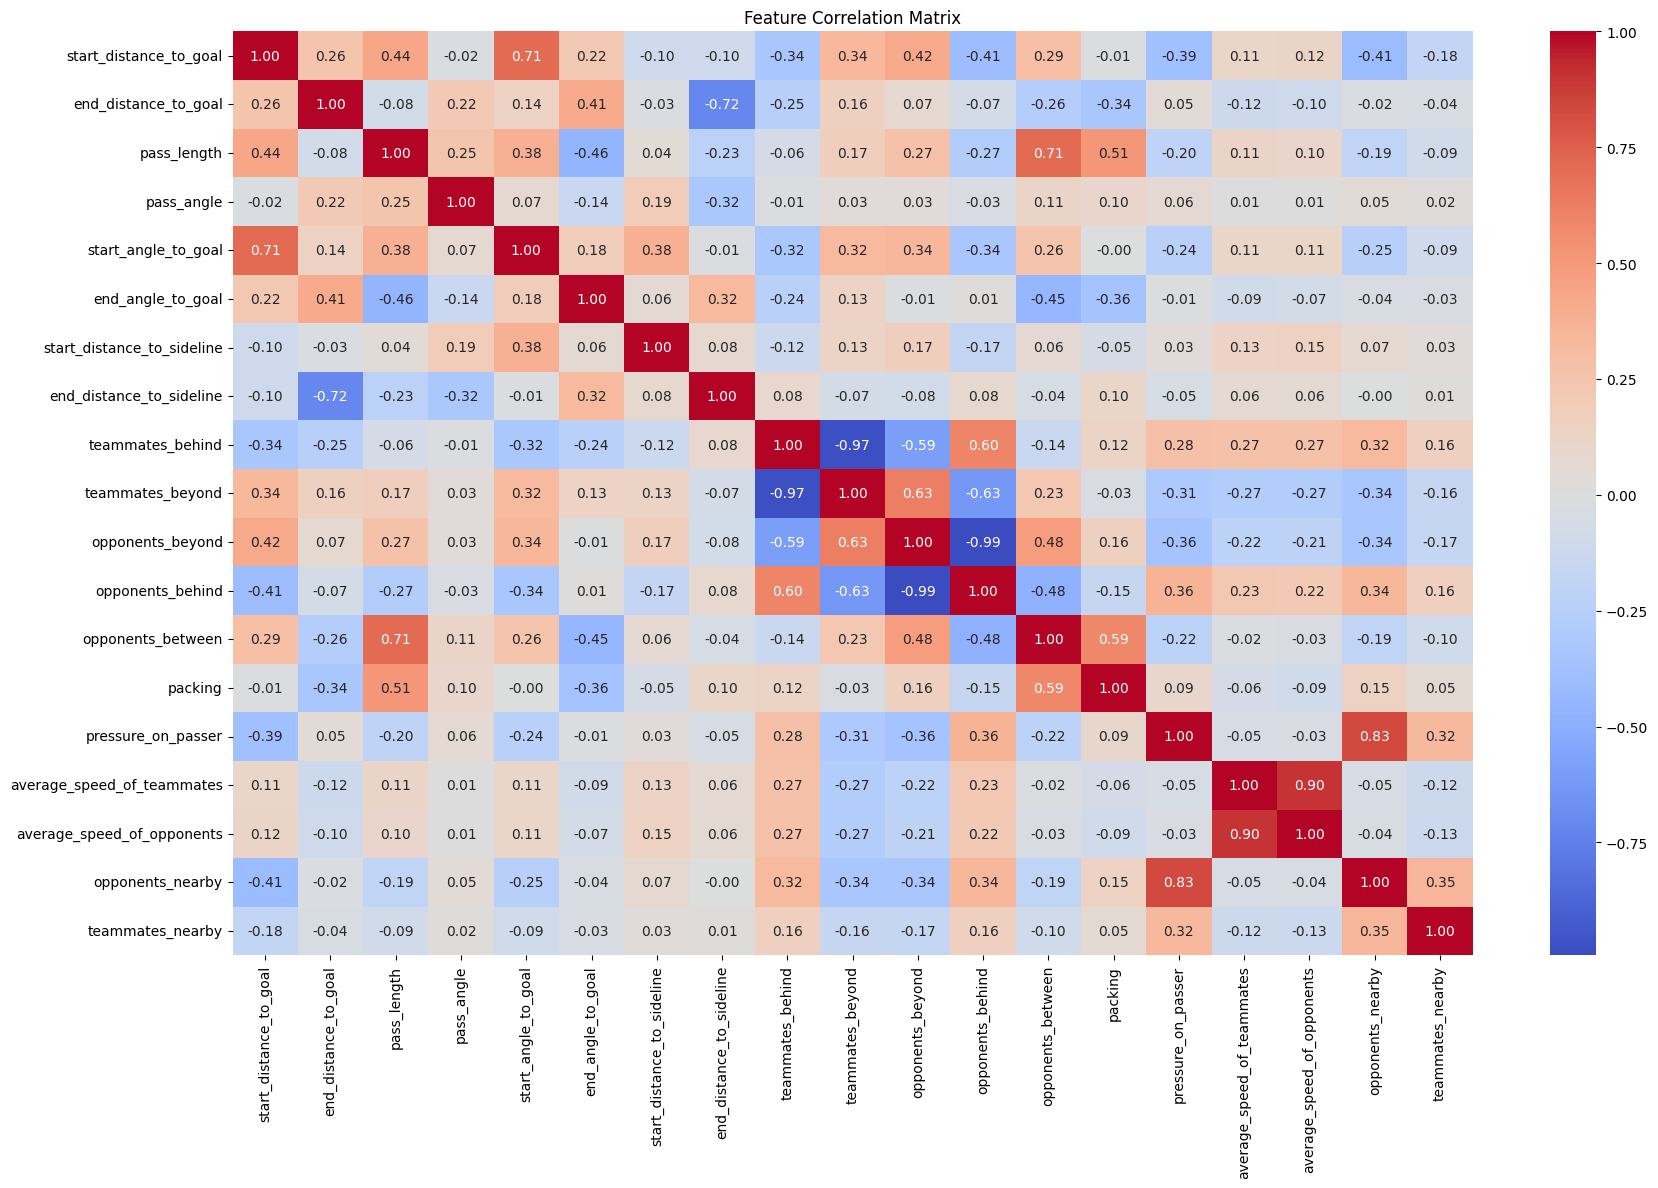

In [27]:
corr_features = features_corr.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr_features, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [28]:
features_train = features_all[['start_distance_to_goal', 'end_distance_to_goal', 'pass_length',
       'pass_angle', 'start_angle_to_goal', 'end_angle_to_goal',
       'start_distance_to_sideline', 'end_distance_to_sideline',
       'forward pass', 'backward pass', 'lateral pass', 'teammates_behind',
       'teammates_beyond', 'opponents_beyond', 'opponents_behind',
       'opponents_between', 'packing', 'pressure_on_passer',
       'average_speed_of_teammates', 'average_speed_of_opponents',
       'opponents_nearby', 'teammates_nearby']]

In [29]:
## based on correaltion matrix, below features is calculated
### two features teammates_behind and opponents_behind are dropped

### speed difference feature is calculated
features_train["speed_difference"] = features_train["average_speed_of_teammates"] - features_train["average_speed_of_opponents"]
features_train.drop(["average_speed_of_teammates","average_speed_of_opponents"],axis=1,inplace=True)

/tmp/ipykernel_207320/367360740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train["speed_difference"] = features_train["average_speed_of_teammates"] - features_train["average_speed_of_opponents"]
/tmp/ipykernel_207320/367360740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train.drop(["average_speed_of_teammates","average_speed_of_opponents"],axis=1,inplace=True)


In [30]:
X = features_all[['start_distance_to_goal', 'end_distance_to_goal', 'pass_length', 'pass_angle', 'start_angle_to_goal', 'end_angle_to_goal', 'teammates_beyond',
       'start_distance_to_sideline', 'end_distance_to_sideline','opponents_beyond','opponents_between', 'packing', 'pressure_on_passer',
       'speed_difference','opponents_nearby', 'teammates_nearby']]

Y = features_all[["possession_xG_target"]]

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=45)

train_data = X_train.copy()
train_data['possession_xG_target'] = Y_train

model_logit_formula =  "possession_xG_target ~ start_distance_to_goal + packing + pass_angle + pass_length + end_distance_to_goal + start_angle_to_goal + start_distance_to_sideline + end_distance_to_sideline + teammates_beyond + opponents_beyond + teammates_nearby + opponents_between + opponents_nearby + opponents_between + pressure_on_passer + end_angle_to_goal + speed_difference"

model_roc = smf.logit(model_logit_formula,data=train_data).fit()

model_roc.summary()


Optimization terminated successfully.
         Current function value: 0.356136
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     possession_xG_target   No. Observations:                55565
Model:                            Logit   Df Residuals:                    55548
Method:                             MLE   Df Model:                           16
Date:                  Sun, 18 May 2025   Pseudo R-squ.:                 0.05233
Time:                          18:08:08   Log-Likelihood:                -19789.
converged:                         True   LL-Null:                       -20881.
Covariance Type:              nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.7534      0.251      6.982      0.000       1.261       2.246
start_distance_to_goal        -0.0163      0.002     -7.085      0.000      -0.021      -0.012
packing                        0.0082      0.012      0.681      0.496      -0.015       0.032
pass_angle                     0.0007      0.000      6.037      0.000       0.000       0.001
pass_length                   -0.0049      0.002     -3.017      0.003      -0.008      -0.002
end_distance_to_goal           0.0063      0.008      0.796      0.426      -0.009       0.022
start_angle_to_goal            0.0348      0.013      2.757      0.006       0.010       0.060
start_distance_to_sideline     0.0165      0.002      8.110      0.000       0.013       0.021
end_distance_to_sideline       0.0373      0.008      4.721      0.000       0.022       0.053
teammates_beyond              -0.0502      0.008     -6.595      0.000      -0.065      -0.035
opponents_beyond              -0.0690      0.008     -8.408      0.000      -0.085      -0.053
teammates_nearby              -0.1114      0.028     -4.037      0.000      -0.166      -0.057
opponents_between              0.0069      0.008      0.878      0.380      -0.008       0.022
opponents_nearby              -0.0779      0.025     -3.157      0.002      -0.126      -0.030
pressure_on_passer             0.0132      0.055      0.242      0.809      -0.094       0.120
end_angle_to_goal             -0.7750      0.121     -6.405      0.000      -1.012      -0.538
speed_difference              -0.0574      0.031     -1.849      0.064      -0.118       0.003
==============================================================================================
"""

In [32]:
test_data = X_test.copy()
test_data['possession_xG_target'] = Y_test

y_pred_prob = model_roc.predict(test_data)

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
roc_auc = auc(fpr, tpr)
brier  = brier_score_loss(Y_test, y_pred_prob)
logloss = log_loss(Y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Logloss:{logloss:.4f}")
print(f"Brier Score:  {brier:.4f}")



ROC AUC: 0.6576
Logloss:0.3571
Brier Score:  0.1039


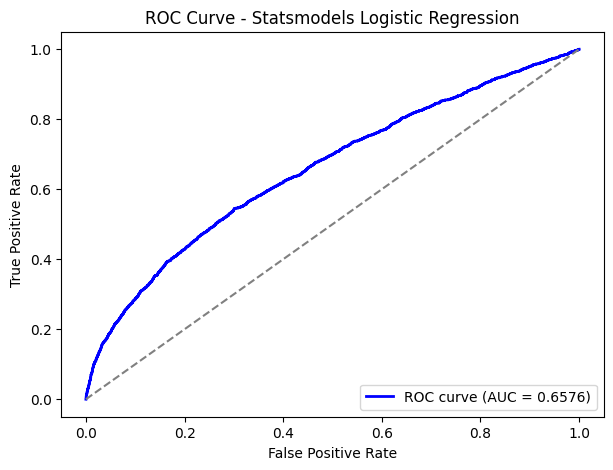

In [33]:
  # Compute AUC (Area Under the Curve)

# Plot ROC Curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Statsmodels Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [34]:
roc_auc

0.6576184116907595

### saving the model

In [16]:
import joblib
joblib.dump(model_roc, 'logistic_model_joblib.sav')

['logistic_model_joblib.sav']

### saving params file

In [38]:
df_params = pd.DataFrame(model_roc.params,columns=["value"]).reset_index()
df_params.rename(columns={'index':'beta_coeff'},inplace = True)

In [18]:
df_params.to_csv("params_logistic.csv",index=False)

### contribution plot of logistic

In [36]:
df_pass = features_all[['id', 'match_id','start_distance_to_goal', 'end_distance_to_goal', 'pass_length',
       'pass_angle', 'start_angle_to_goal', 'end_angle_to_goal',
       'start_distance_to_sideline', 'end_distance_to_sideline',
        'teammates_behind','teammates_beyond', 'opponents_beyond', 'opponents_behind',
       'opponents_between', 'packing', 'pressure_on_passer',
       'average_speed_of_teammates', 'average_speed_of_opponents',
       'opponents_nearby', 'teammates_nearby','speed_difference']]

In [40]:
intercept_val = df_params[df_params["beta_coeff"] == "Intercept"]['value'].values[0]
paramaters = df_params[df_params["beta_coeff"] != "Intercept" ]
for _,val in paramaters.iterrows():
    param_name = val['beta_coeff']
    param_val  = val['value']
    contribution_col = f"{param_name}_contribution"

    df_pass[contribution_col] = df_pass[param_name] * param_val

    df_pass[contribution_col] -= df_pass[contribution_col].mean()

df_contribution_val = df_pass[['id', 'match_id'] + [col for col in df_pass.columns if 'contribution' in col]]

/tmp/ipykernel_207320/3038441976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass[contribution_col] = df_pass[param_name] * param_val
/tmp/ipykernel_207320/3038441976.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass[contribution_col] -= df_pass[contribution_col].mean()
/tmp/ipykernel_207320/3038441976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [41]:
df_contribution_val

,id,match_id,start_distance_to_goal_contribution,packing_contribution,pass_angle_contribution,pass_length_contribution,end_distance_to_goal_contribution,start_angle_to_goal_contribution,start_distance_to_sideline_contribution,end_distance_to_sideline_contribution,teammates_beyond_contribution,opponents_beyond_contribution,teammates_nearby_contribution,opponents_between_contribution,opponents_nearby_contribution,pressure_on_passer_contribution,end_angle_to_goal_contribution,speed_difference_contribution
0,1256506933,5321419,-0.242890,-0.001429,-0.113853,-0.026542,0.067246,0.063787,0.083555,-0.426247,-0.084101,-0.149711,0.026883,0.020599,0.091206,-0.005755,0.040852,0.021394
1,1256508233,5321419,0.127450,-0.009613,0.050982,0.042573,0.060790,-0.000506,0.230367,0.131622,0.016357,-0.011719,0.026883,-0.000004,0.013296,0.004504,-0.816652,-0.007736
2,1256507062,5321419,-0.134918,-0.009613,0.079256,0.015251,0.116735,0.043141,0.125405,-0.502320,-0.134330,-0.149711,0.026883,-0.034342,0.013296,0.000623,-0.213433,-0.022032
3,1256507101,5321419,0.056179,-0.009613,0.114843,0.049892,0.001296,-0.042366,-0.175812,-0.324816,0.116815,-0.011719,0.026883,0.006864,0.013296,-0.003204,0.563150,-0.008227
4,1256507134,5321419,-0.121625,0.006754,-0.099127,0.076624,0.046303,-0.022282,-0.203150,-0.096597,-0.084101,-0.149711,0.026883,-0.027474,0.013296,-0.004691,-0.353308,0.002730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74082,1625749288,5420697,0.253751,0.006754,0.099176,0.046074,-0.090676,-0.018071,0.277119,0.291678,0.116815,0.195269,0.026883,-0.013739,-0.064613,0.001509,0.259207,-0.014908
74083,1625749300,5420697,-0.299518,0.006754,0.079258,-0.197426,0.023519,0.009552,-0.175738,-0.372960,0.116815,0.264265,-0.084552,-0.013739,0.013296,-0.005515,0.348669,-0.028931
74084,1625749310,5420697,0.157151,0.006754,0.057893,-0.126149,-0.016298,-0.065913,-0.184907,-0.227948,0.217274,0.402257,-0.084552,0.020599,0.013296,0.000233,0.607551,-0.019935
74085,1625748978,5420697,0.230927,-0.001429,0.082872,-0.059041,0.022678,-0.014766,0.289748,-0.457550,-0.033872,0.264265,-0.195986,-0.013739,-0.064613,0.009523,0.690940,0.054166


In [42]:
xT_val = []
for _, passes in df_pass.iterrows():
    linear_combination = intercept_val

    for _,param in paramaters.iterrows():
        param_name = param['beta_coeff']
        param_val = param["value"]
        linear_combination += passes[param_name] * param_val
    xT = 1 / (1 + np.exp(-linear_combination))
    xT_val.append(xT)

In [43]:
df_pass['xT_predicted'] = xT_val
df_contribution_val['xT'] = xT_val

/tmp/ipykernel_207320/3024560581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['xT_predicted'] = xT_val
/tmp/ipykernel_207320/3024560581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_contribution_val['xT'] = xT_val


In [44]:
df_contribution_val.columns

Index(['id', 'match_id', 'start_distance_to_goal_contribution',
       'packing_contribution', 'pass_angle_contribution',
       'pass_length_contribution', 'end_distance_to_goal_contribution',
       'start_angle_to_goal_contribution',
       'start_distance_to_sideline_contribution',
       'end_distance_to_sideline_contribution',
       'teammates_beyond_contribution', 'opponents_beyond_contribution',
       'teammates_nearby_contribution', 'opponents_between_contribution',
       'opponents_nearby_contribution', 'pressure_on_passer_contribution',
       'end_angle_to_goal_contribution', 'speed_difference_contribution',
       'xT'],
      dtype='object')

In [45]:
df_contribution_plot = df_contribution_val[['start_distance_to_goal_contribution',
       'packing_contribution', 'pass_angle_contribution',
       'pass_length_contribution', 'end_distance_to_goal_contribution',
       'start_angle_to_goal_contribution',
       'start_distance_to_sideline_contribution',
       'end_distance_to_sideline_contribution',
       'teammates_beyond_contribution', 'opponents_beyond_contribution',
       'teammates_nearby_contribution', 'opponents_between_contribution',
       'opponents_nearby_contribution', 'pressure_on_passer_contribution',
       'end_angle_to_goal_contribution', 'speed_difference_contribution']]

In [46]:
df_contribution_plot

,start_distance_to_goal_contribution,packing_contribution,pass_angle_contribution,pass_length_contribution,end_distance_to_goal_contribution,start_angle_to_goal_contribution,start_distance_to_sideline_contribution,end_distance_to_sideline_contribution,teammates_beyond_contribution,opponents_beyond_contribution,teammates_nearby_contribution,opponents_between_contribution,opponents_nearby_contribution,pressure_on_passer_contribution,end_angle_to_goal_contribution,speed_difference_contribution
0,-0.242890,-0.001429,-0.113853,-0.026542,0.067246,0.063787,0.083555,-0.426247,-0.084101,-0.149711,0.026883,0.020599,0.091206,-0.005755,0.040852,0.021394
1,0.127450,-0.009613,0.050982,0.042573,0.060790,-0.000506,0.230367,0.131622,0.016357,-0.011719,0.026883,-0.000004,0.013296,0.004504,-0.816652,-0.007736
2,-0.134918,-0.009613,0.079256,0.015251,0.116735,0.043141,0.125405,-0.502320,-0.134330,-0.149711,0.026883,-0.034342,0.013296,0.000623,-0.213433,-0.022032
3,0.056179,-0.009613,0.114843,0.049892,0.001296,-0.042366,-0.175812,-0.324816,0.116815,-0.011719,0.026883,0.006864,0.013296,-0.003204,0.563150,-0.008227
4,-0.121625,0.006754,-0.099127,0.076624,0.046303,-0.022282,-0.203150,-0.096597,-0.084101,-0.149711,0.026883,-0.027474,0.013296,-0.004691,-0.353308,0.002730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74082,0.253751,0.006754,0.099176,0.046074,-0.090676,-0.018071,0.277119,0.291678,0.116815,0.195269,0.026883,-0.013739,-0.064613,0.001509,0.259207,-0.014908
74083,-0.299518,0.006754,0.079258,-0.197426,0.023519,0.009552,-0.175738,-0.372960,0.116815,0.264265,-0.084552,-0.013739,0.013296,-0.005515,0.348669,-0.028931
74084,0.157151,0.006754,0.057893,-0.126149,-0.016298,-0.065913,-0.184907,-0.227948,0.217274,0.402257,-0.084552,0.020599,0.013296,0.000233,0.607551,-0.019935
74085,0.230927,-0.001429,0.082872,-0.059041,0.022678,-0.014766,0.289748,-0.457550,-0.033872,0.264265,-0.195986,-0.013739,-0.064613,0.009523,0.690940,0.054166


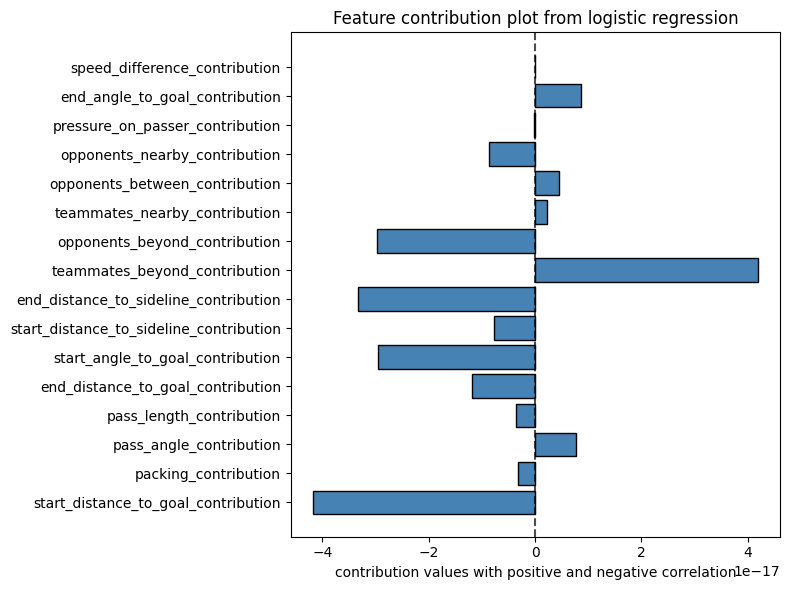

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

means = df_contribution_plot.mean().fillna(0)
df_mean = means.to_frame(name="Mean Contribution")

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.barh(
    df_mean.index,
    df_mean["Mean Contribution"],
    color="steelblue",    # ← same color for every bar
    edgecolor="black"
)

ax.axvline(0, color="black", linestyle="--", alpha=0.7)
ax.set_title("Feature contribution plot from logistic regression")
ax.set_xlabel("contribution values with positive and negative correlation")

plt.tight_layout()
plt.show()


In [48]:
means

start_distance_to_goal_contribution       -4.176730e-17
packing_contribution                      -3.128951e-18
pass_angle_contribution                    7.720476e-18
pass_length_contribution                  -3.500588e-18
end_distance_to_goal_contribution         -1.179650e-17
start_angle_to_goal_contribution          -2.953022e-17
start_distance_to_sideline_contribution   -7.683012e-18
end_distance_to_sideline_contribution     -3.327957e-17
teammates_beyond_contribution              4.186320e-17
opponents_beyond_contribution             -2.963512e-17
teammates_nearby_contribution              2.169885e-18
opponents_between_contribution             4.501613e-18
opponents_nearby_contribution             -8.751471e-18
pressure_on_passer_contribution           -2.202853e-19
end_angle_to_goal_contribution             8.631588e-18
speed_difference_contribution             -4.345765e-20
dtype: float64

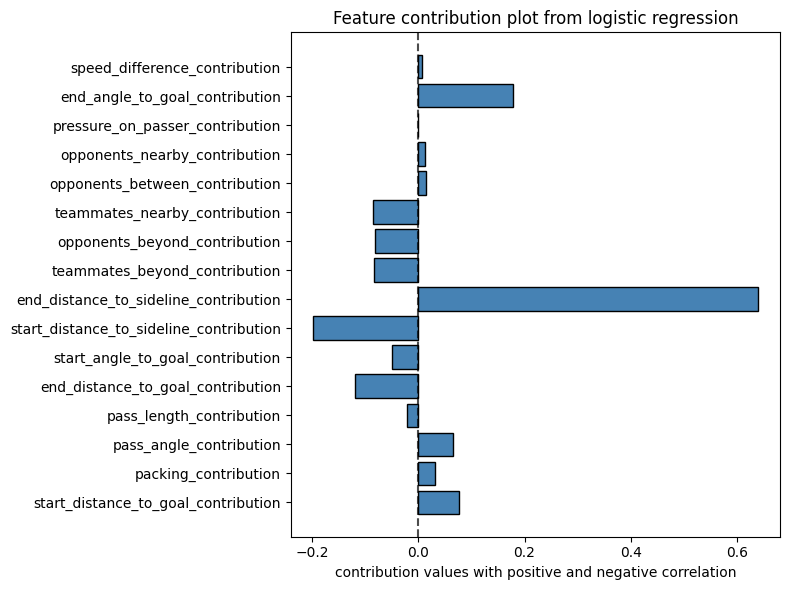

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

row = (
    df_contribution_val[df_contribution_val["id"] == 1442323882]
    .iloc[0]                  # get the first (and only) matching row as a Series
    .drop("id")
    .drop("match_id")
    .drop("xT")
                                  # drop the id column so only feature columns remain
)
df_mean = row.to_frame(name="Mean Contribution")

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.barh(
    df_mean.index,
    df_mean["Mean Contribution"],
    color="steelblue",    # ← same color for every bar
    edgecolor="black"
)

ax.axvline(0, color="black", linestyle="--", alpha=0.7)
ax.set_title("Feature contribution plot from logistic regression")
ax.set_xlabel("contribution values with positive and negative correlation")

plt.tight_layout()
plt.show()


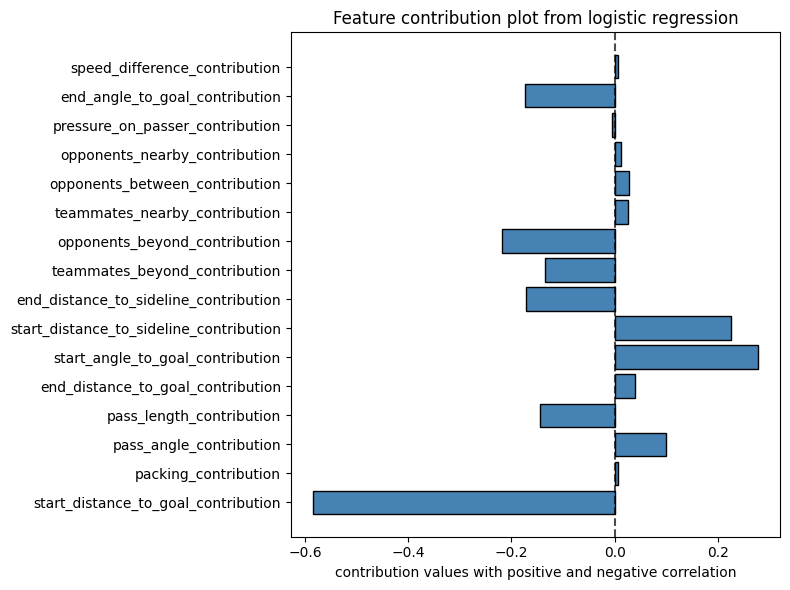

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

row = (
    df_contribution_val[df_contribution_val["id"] == 1442323219]
    .iloc[0]                  # get the first (and only) matching row as a Series
    .drop("id")
    .drop("match_id")
    .drop("xT")
                                  # drop the id column so only feature columns remain
)
df_mean = row.to_frame(name="Mean Contribution")

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.barh(
    df_mean.index,
    df_mean["Mean Contribution"],
    color="steelblue",    # ← same color for every bar
    edgecolor="black"
)

ax.axvline(0, color="black", linestyle="--", alpha=0.7)
ax.set_title("Feature contribution plot from logistic regression")
ax.set_xlabel("contribution values with positive and negative correlation")

plt.tight_layout()
plt.show()

### visualization plots of features

In [30]:
features_possession_goal_successfull = features_all[features_all["possession_xG_target"] == True]

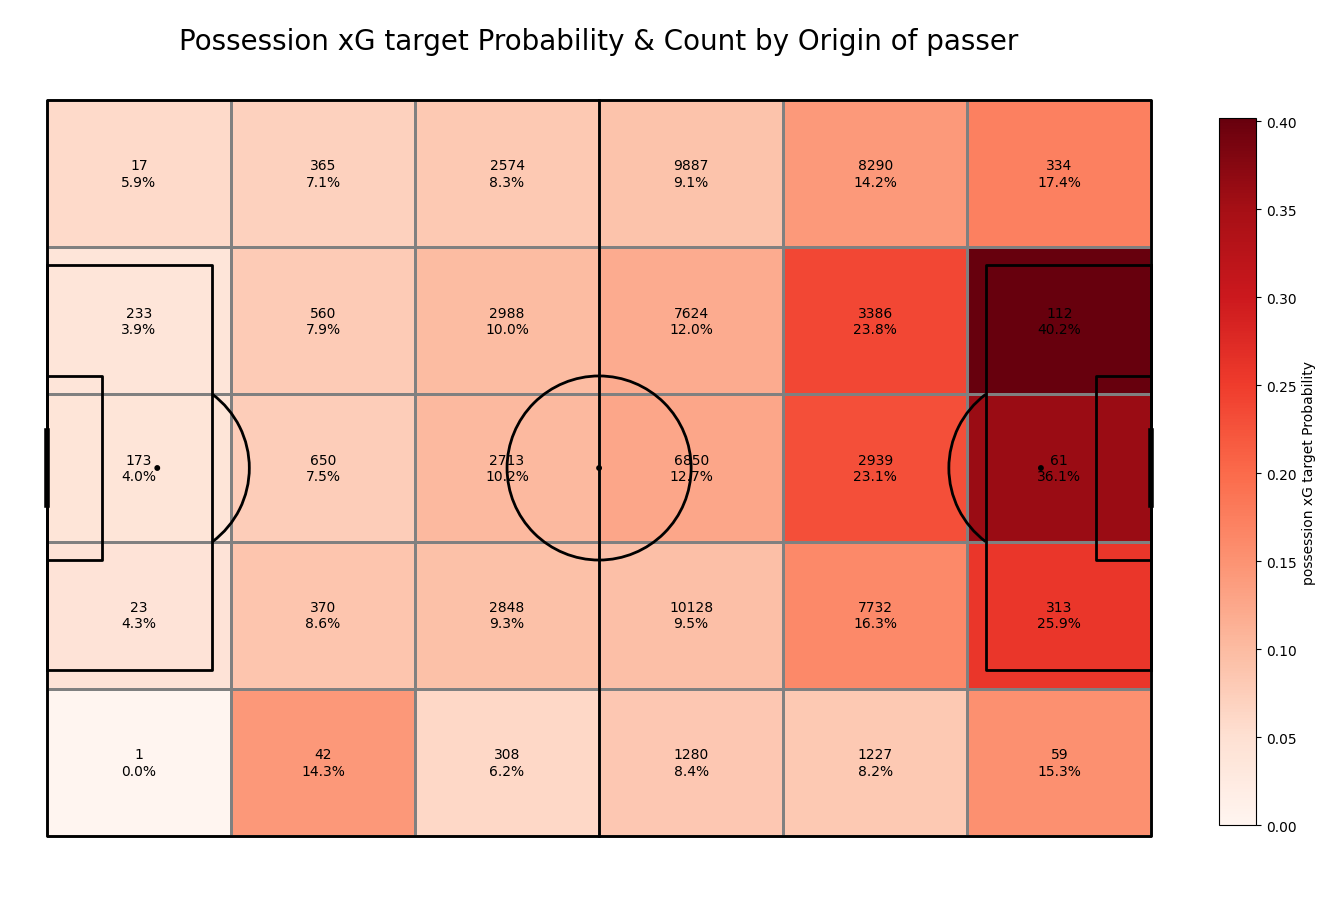

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Define pitch with vertical orientation
pitch = Pitch(pitch_type='statsbomb', orientation='vertical', line_zorder=2, line_color='black')

# Create figure and pitch grid
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Define binning parameters
bins_x, bins_y = 6, 5  # Adjust bins if needed

# Compute 2D histogram for total passes
bin_statistic = pitch.bin_statistic(features_all['passer_x'], 
                                    features_all['passer_y'], 
                                    statistic='count', bins=(bins_x, bins_y), normalize=False)

# Compute 2D histogram for successful passes
success_bin_stat = pitch.bin_statistic(features_possession_goal_successfull['passer_x'], 
                                       features_possession_goal_successfull['passer_y'], 
                                       statistic='count', bins=(bins_x, bins_y), normalize=False)

# Convert structured arrays to NumPy arrays
total_passes_array = np.array(bin_statistic['statistic'])
success_passes_array = np.array(success_bin_stat['statistic'])

# Calculate pass success probability per bin (handling divide-by-zero)
pass_success_prob = np.divide(success_passes_array, total_passes_array, 
                              out=np.zeros_like(total_passes_array), 
                              where=total_passes_array != 0)

# Store results back in bin_statistic for proper usage
bin_statistic['statistic'] = pass_success_prob

# Plot the heatmap using the correct bin_statistic object
pcm = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])

# Fix annotation loop: Use the correct array shape dynamically
rows, cols = total_passes_array.shape  # Get actual dimensions

for i in range(rows):  # Iterate safely over rows
    for j in range(cols):  # Iterate safely over cols
        total_passes = total_passes_array[i, j]
        success_rate = pass_success_prob[i, j]
        if total_passes > 0:  # Show only where passes exist
            ax['pitch'].text(bin_statistic['cx'][i, j], bin_statistic['cy'][i, j], 
                             f'{int(total_passes)}\n{success_rate*100:.1f}%', 
                             ha='center', va='center', fontsize=10, color='black')

# Add colorbar
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.set_label('possession xG target Probability')

# Set title
fig.suptitle('Possession xG target Probability & Count by Origin of passer', fontsize=20)

# Show the plot
plt.show()
